# Trade and Ahead

## Problem Statement 

### Context
The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

### Objective
Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

## Importing necessary libraries 

In [1]:
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

#Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
#Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#To scale the data using z-score
from sklearn.preprocessing import StandardScaler

#To compute distances
from scipy.spatial.distance import cdist, pdist

#To perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#To visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#To suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset 

In [2]:
#Importing the dataset
data = pd.read_csv('stock_data.csv')

## Overview of the dataset

### Checking the shape of the dataset 

In [3]:
#Checking the shape of the dataset
data.shape

(340, 15)

### Displaying few rows in the dataset 

In [4]:
#Displaying random rows of the dataset
data.sample(n=10,random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Datatypes of the dataset 

In [5]:
#Different datatypes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* There are a total of 4 categorical datatypes in this dataset, in which are the ticker symbols, the Security's name, the Sector the stock belongs to, and the Industry the stock belongs to

* There are a total of 11 numerical datatypes, 7 of them being floats and 4 of them being integers

### Create a new dataset with the orignal data

In [6]:
df = data.copy()

### Checking for duplicates and missing values 

In [7]:
print('-Number of duplicated values-')
print(df.duplicated().sum())
print('-'*33)
print('-Number of missing values-')
print(df.isnull().sum())

-Number of duplicated values-
0
---------------------------------
-Number of missing values-
Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


### Statistical Summary of the dataset

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


* For the categorical variables, we can see that the top security that appears is American Airlines, and the top sector that appears is industrials and the top sub industry is in oil and gas
* You see that the average current price is around 81 dollars, while the max is also around 1275 dollars, along with a price change of 4 dollars on avereage. Also to take note, the median current price is around 60 dollars and the median price change is 4.82, which indicates right and left skewness
* Majority of companies within this porftolio might be growth stocks, which is why the P/E ratio is very high, as well as being skewed to the right
* Some companies operate with a net loss, in which indicates that there are too many expenses, and net income is heavily skewed to the right

## Exploratory Data Analysis 

### Univariate Analysis 

In [9]:
#Function to create a histogram and boxplot
def histogram_boxplot(df, feature, figsize=(12,7), kde=False, bins=None):
    #Creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)}, 
        figsize=figsize,
    )
    
    #Creating a boxplot
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color='violet'
    )
    
    #Creating a histogram
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )
    
    #Creating a line for mean
    ax_hist2.axvline(df[feature].mean(), color='green', linestyle='--')
    
    #Creating a line for the median 
    ax_hist2.axvline(df[feature].median(), color='black', linestyle='-')

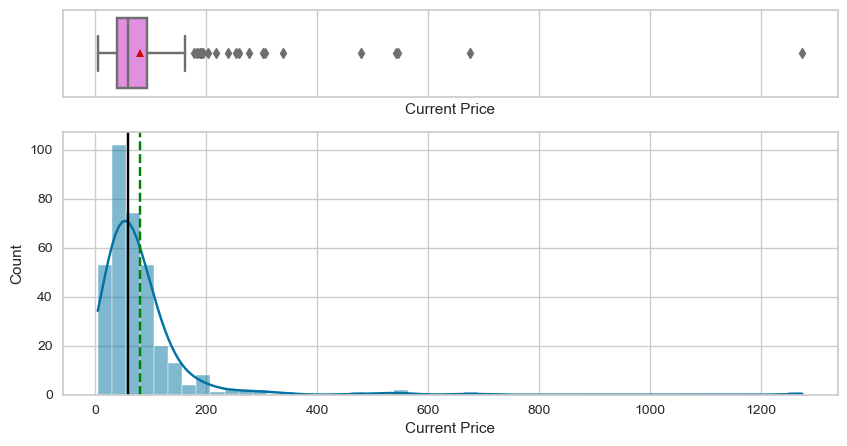

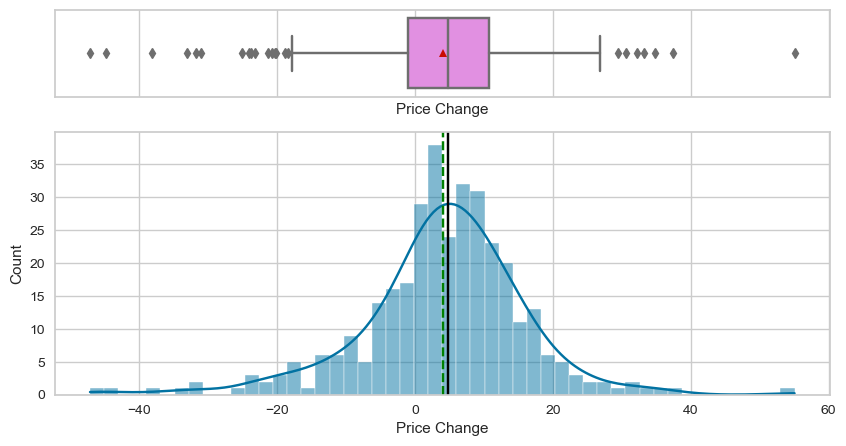

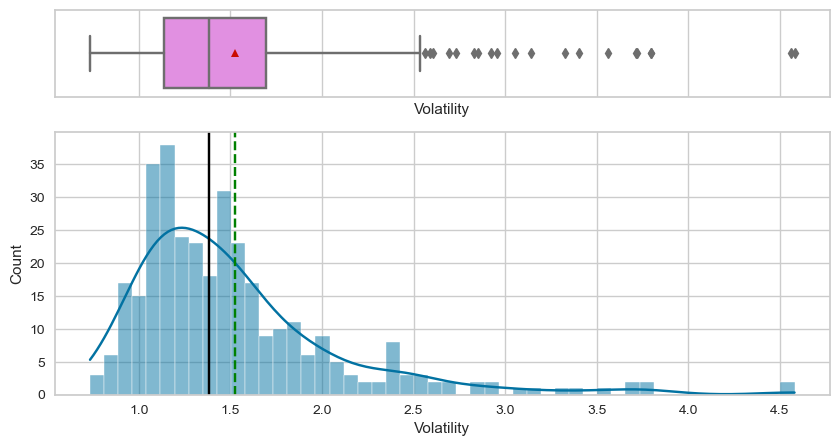

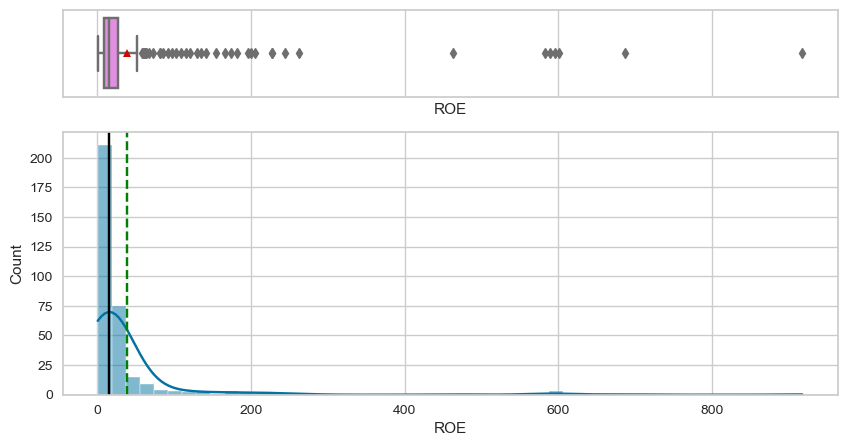

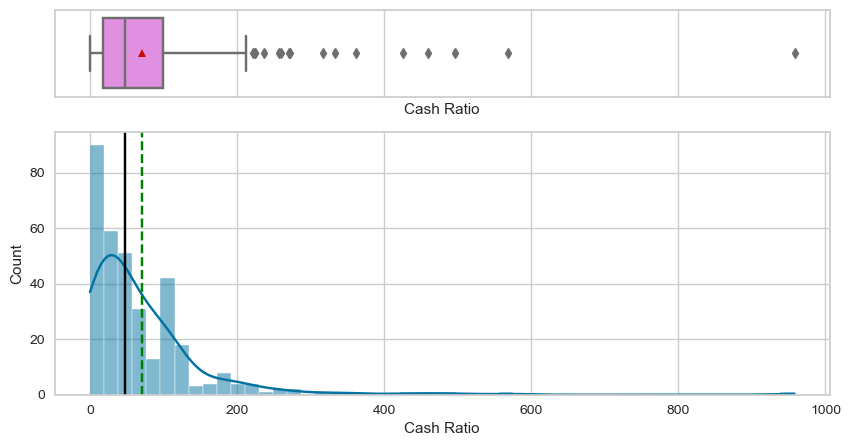

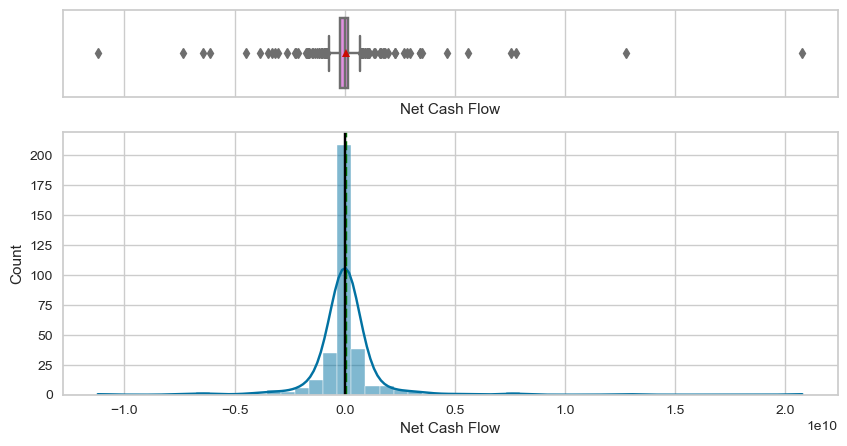

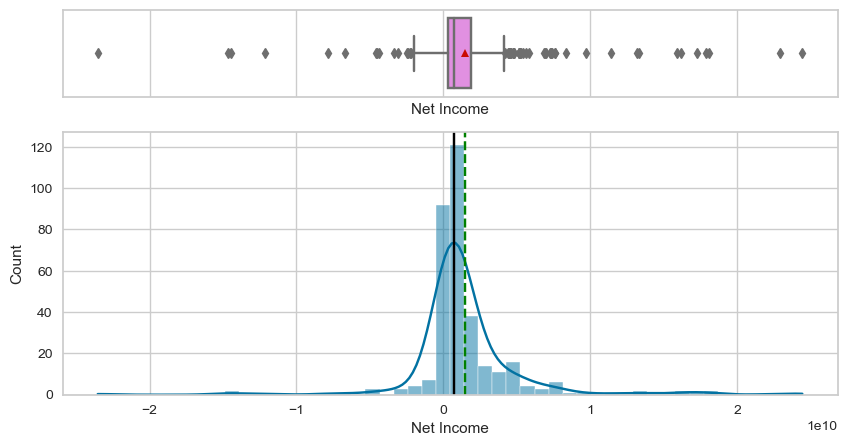

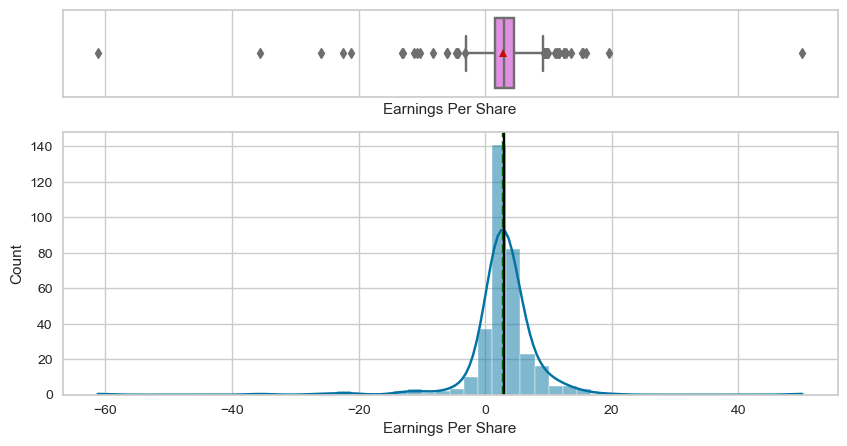

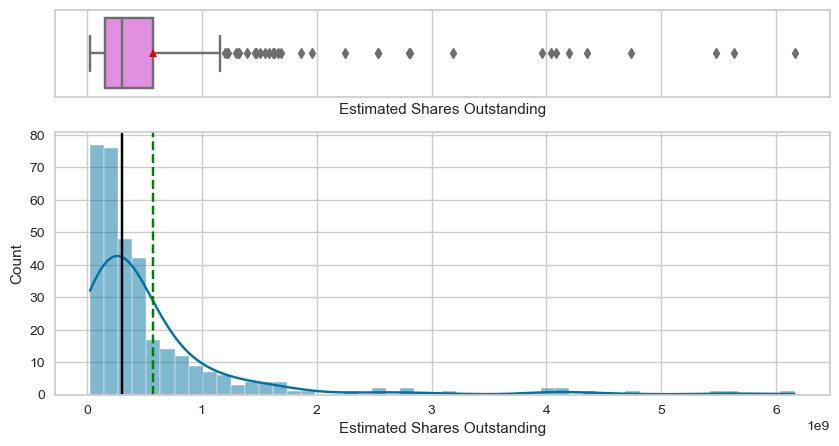

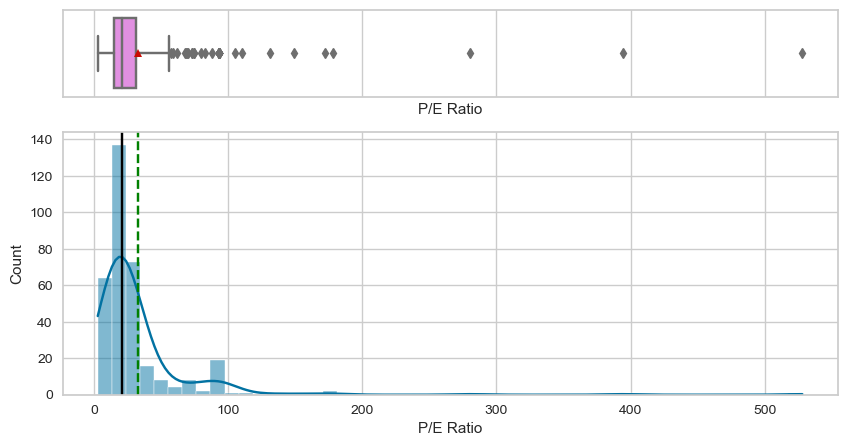

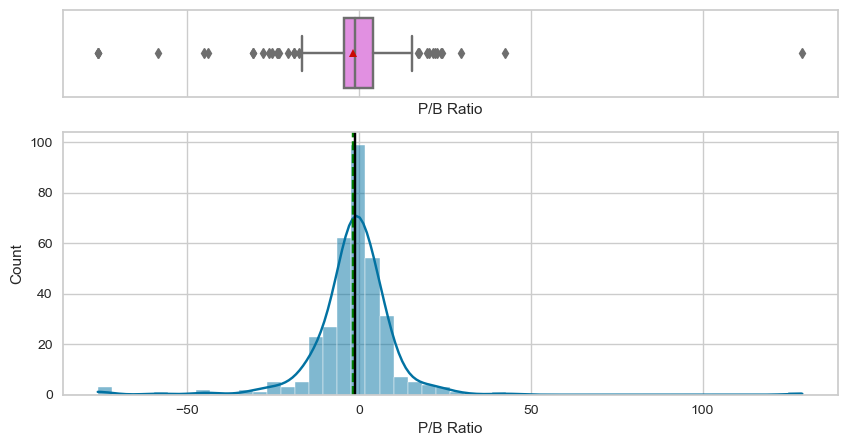

In [10]:
#Function for the numerical variables
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10,5))

* Current price as predicted is skewed to the right with a couple of outliers, while price change is approximately normal with outliers coming from both whiskers
* Volatility is skewed to the right which means most of the stocks risk falls within that region and also has a few outliers
* ROE has majority outliers, which also indicates that most companies have a low ROE, as well as being skewed to thr right as a result 
* When coming to the financial ratios, we come to the conclusion that the cash ratio, estimated shares outstanding, and P/E ratio are skewed to the right, while the rest are approximately normalz

In [11]:
#Function to create label barplots
def labeled_barplot(df, feature, perc=False, n=None):
    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### This if for the GICS Sectors 

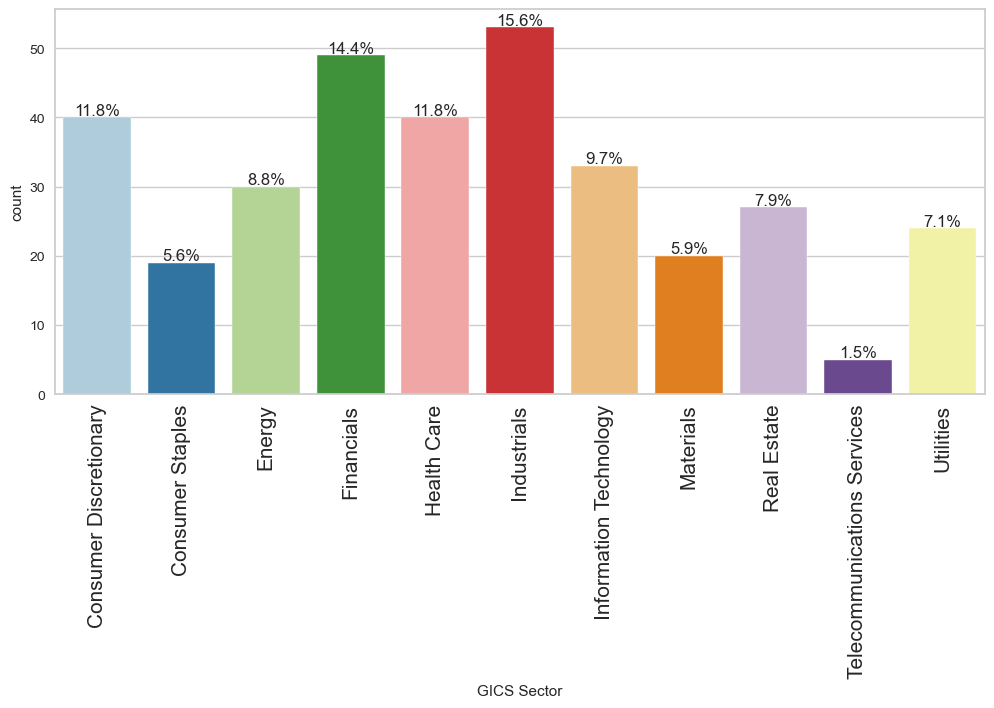

In [12]:
labeled_barplot(df, 'GICS Sector', perc=True)

* The top companies are consumer discretionary, Health-care, Financials, and Industrials, with Industrials being the top

#### This is for the GICS Sub-Industries 

<Figure size 1500x700 with 0 Axes>

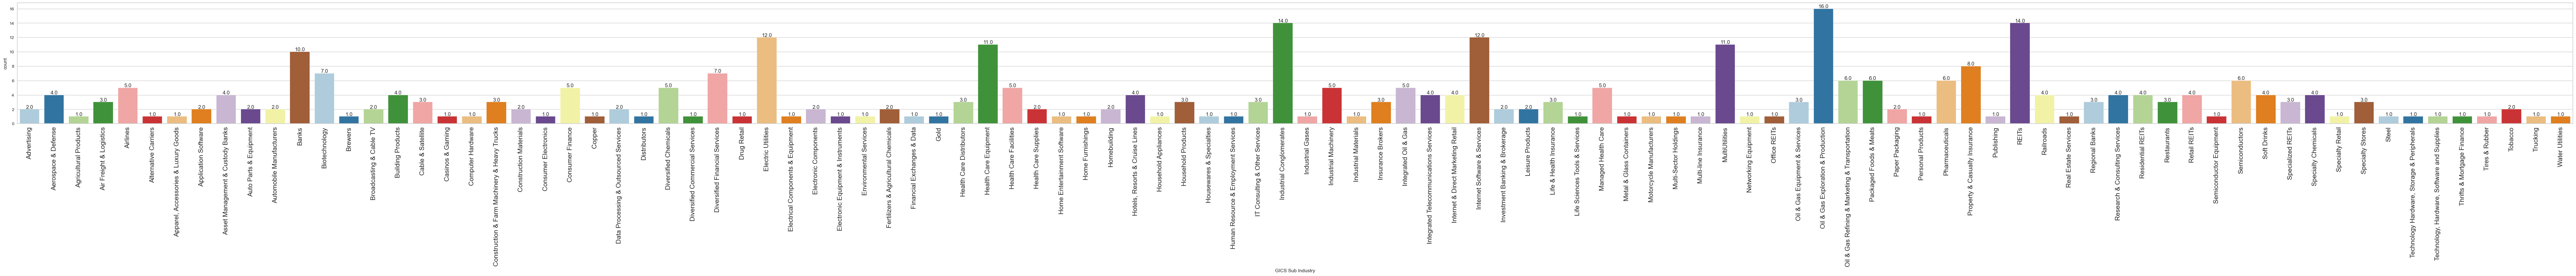

In [13]:
plt.figure(figsize=(15,7))
labeled_barplot(df, 'GICS Sub Industry')
plt.show()

Oil and gas is the top

### Bivariate Analysis 

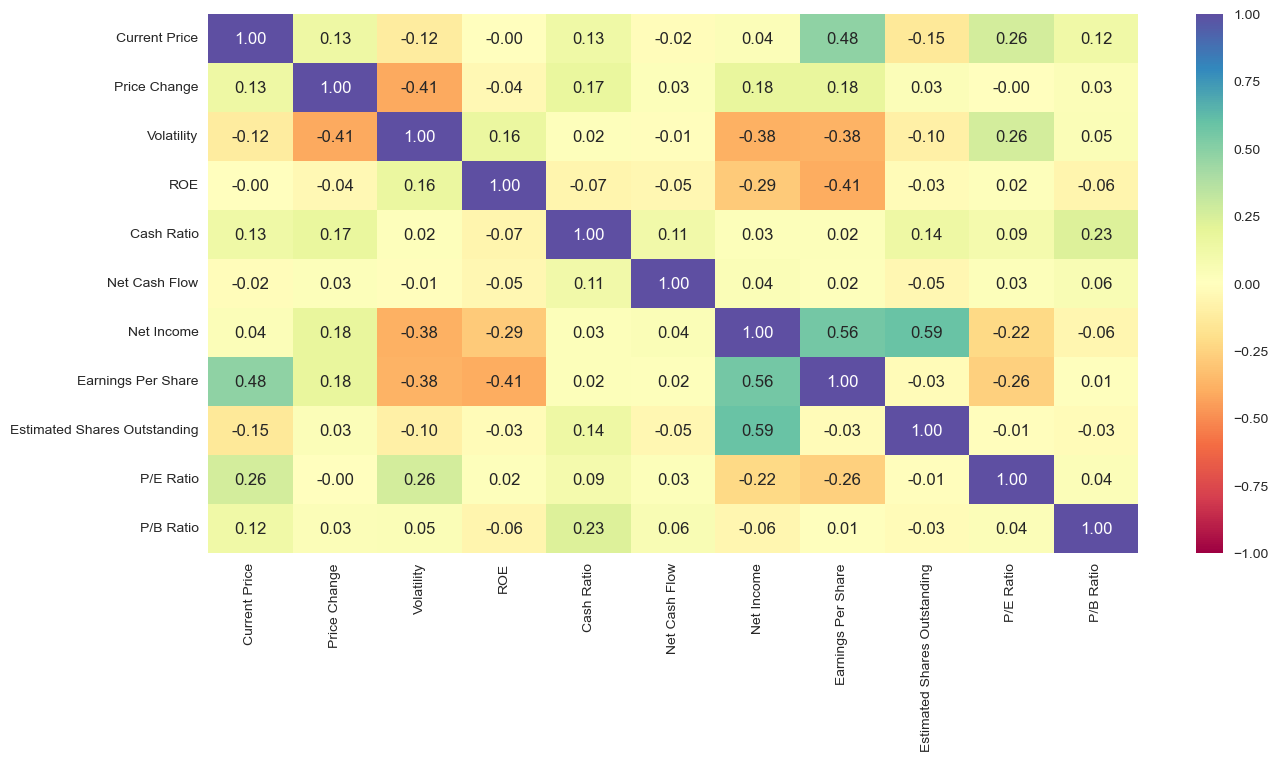

In [14]:
#Correlation check
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='Spectral')
plt.show()

* Net Income and Earnings per share have a semi strong positive correlation, as well as net income and estimated shares outstanding

#### Let's see which economic sector has seen the biggest price increase 

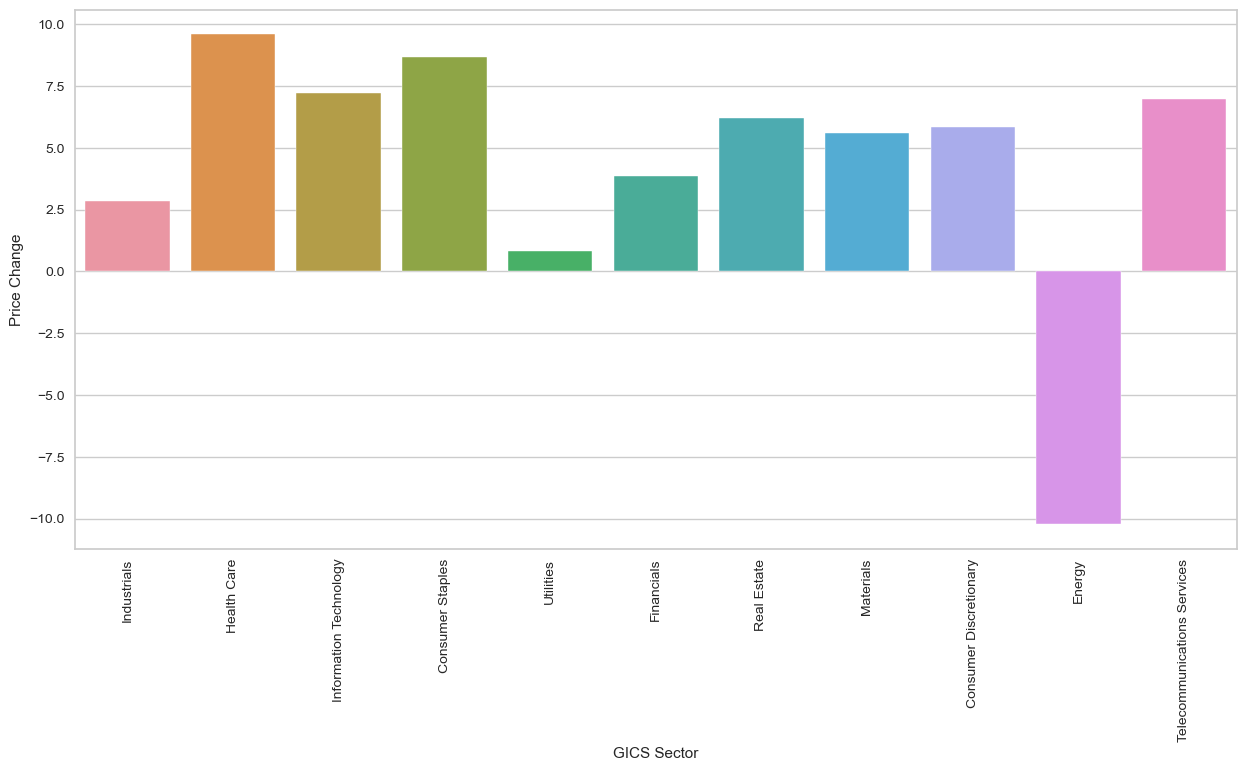

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

We can see that the healthcare industry has had the biggest price change, but consumer staples is falling at second. The Energy sector had a big price decrease due to many challenges with oil and gas

#### Let's see how cash ratios vary across sectors

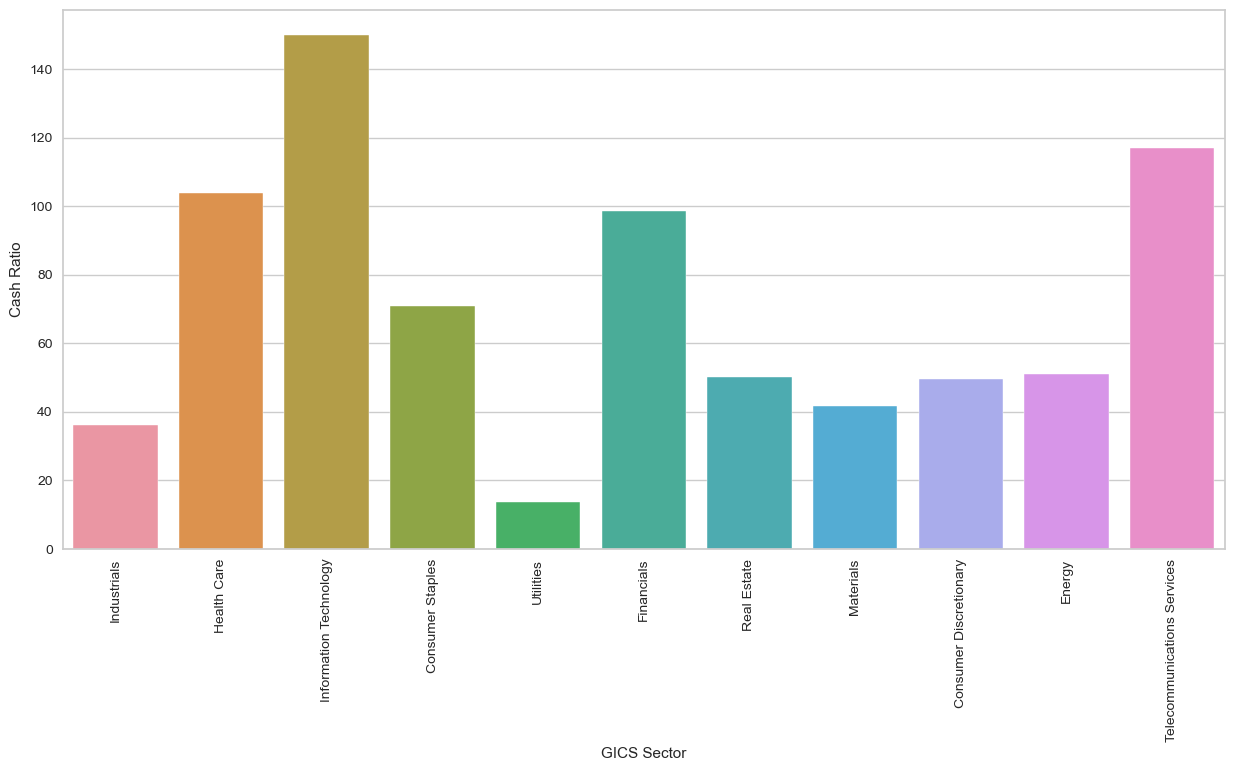

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

When it comes to paying off short term assets, the cash ratio determines how much cash the company has on hand to pay it. Wtih this in regard, we can see that the information technology sector has the the highest cash ratio, as well as the telecommunications services and health care following that 

#### Let's see how volalite each economic sector is  

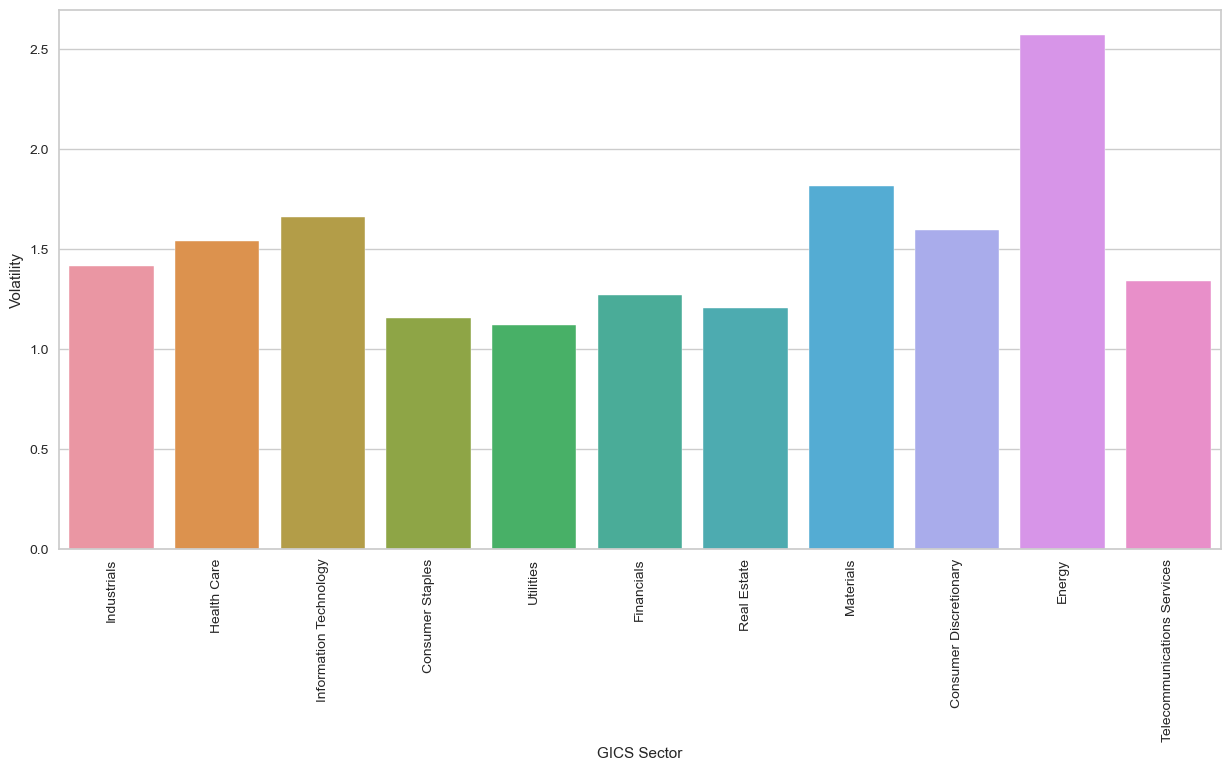

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

We can see that the Energy sector is going through the most volatility. The volatility is measured either through beta or standard deviation. This is measured through standard deviation

#### Let's see how the P/E ratio varies across economic sectors 

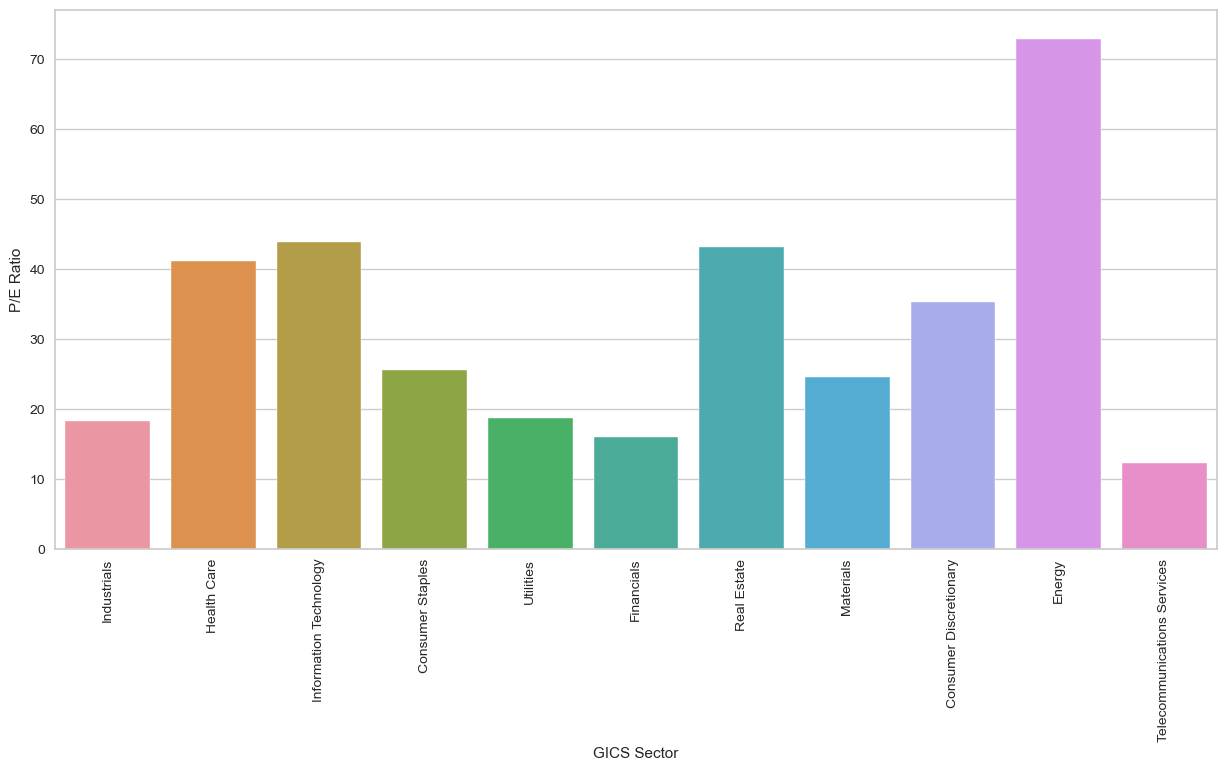

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

The Energy sector, followed by the tech, Health Care, and Real Estate sectors all have average P/E ratios greater than 40. This indicates how many times the investor is paying for a share of stock relative to their earnings. This shows that most of the sectors mentioned ask for 40 to 70 times the earnings they make for a single stock

## Data Preprocessing 

### Outlier Check 

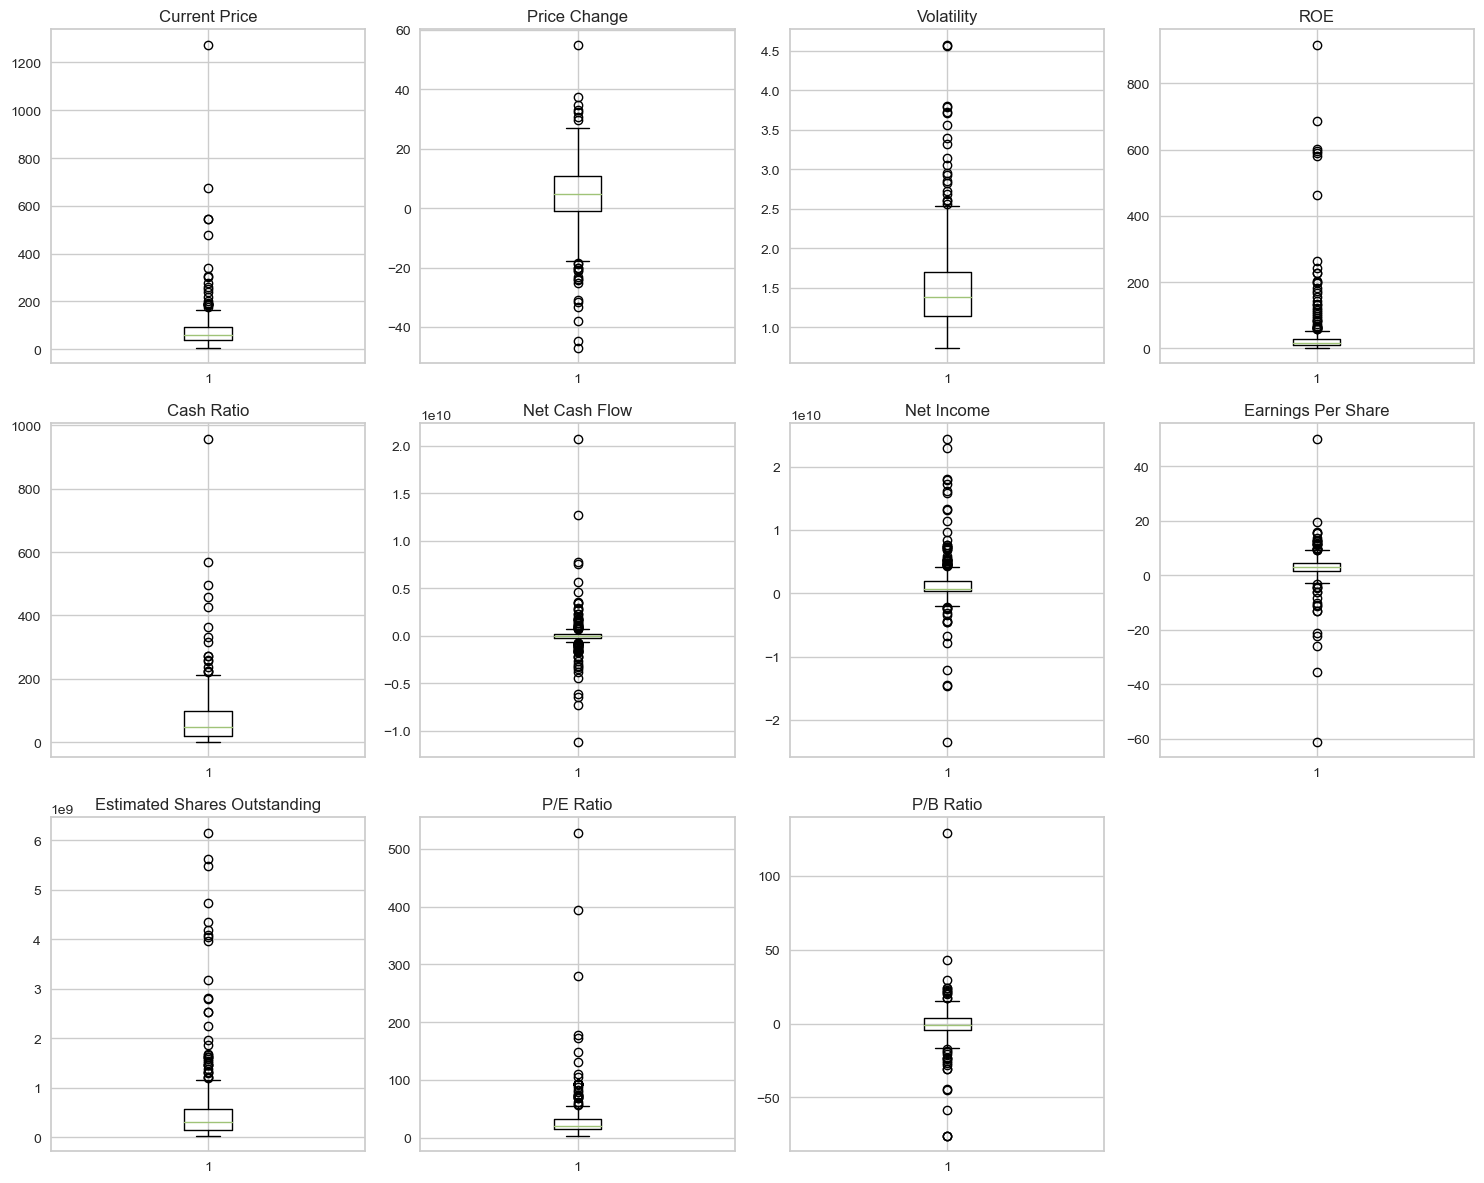

In [19]:
plt.figure(figsize=(15,12))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

All seem to be have outliers, but seem to be part of the dataset, in which it does not need to be accounted for

### Scaling 

In [20]:
#Scaling the data
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [21]:
#Turning the scaled data into a dataset
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## KMeans Clustering

In [22]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


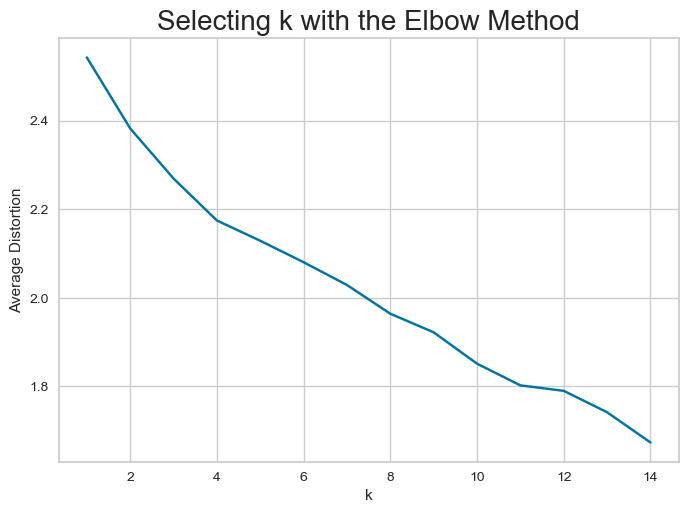

In [23]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

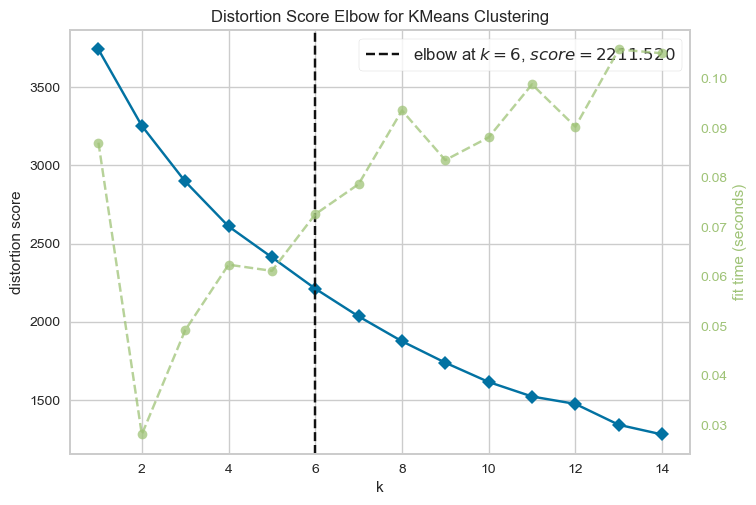

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

6 seems like the best amount of clusters to use

### Checking the Silhouette Scores 

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


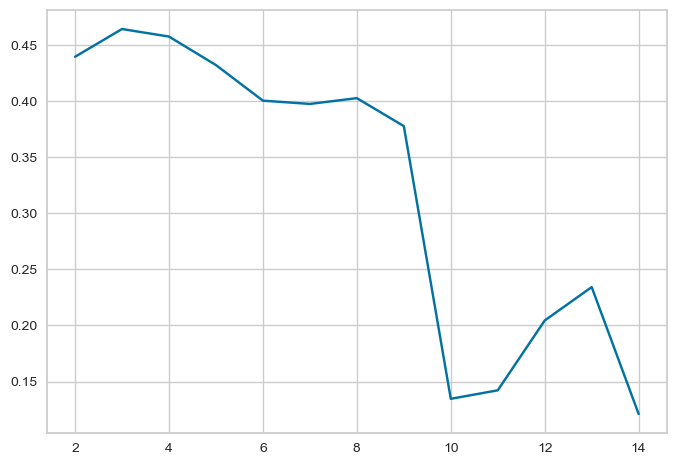

In [25]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

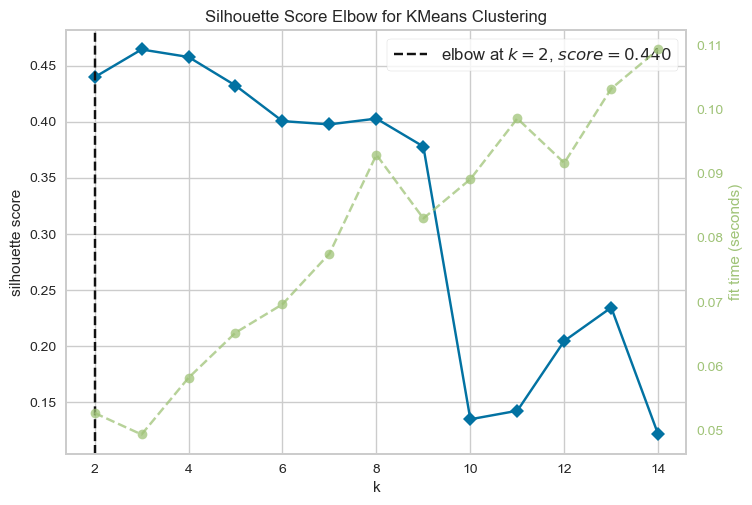

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df) 
visualizer.show()  

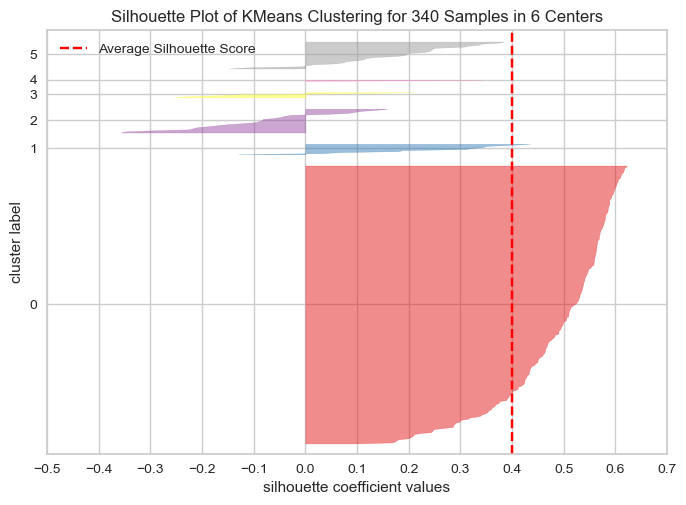

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=6, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

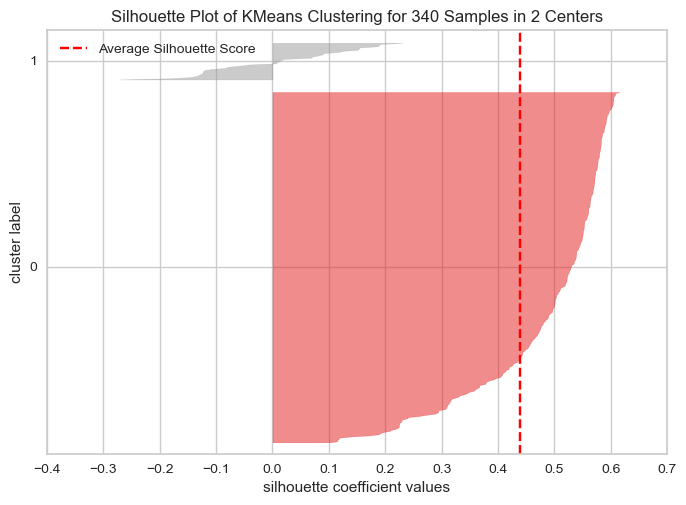

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=2, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

We will use 6 clusters for the dataset

## Creating Final Model for KMeans

In [29]:
#Final model for kmeans
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [30]:
#Creating a copy of the dataset
df1 = df.copy()

#Adding the groups to the dataset
k_means_df['KM_Segments'] = kmeans.labels_
df1['KM_Segments'] = kmeans.labels_

### Cluster Profiling 

In [31]:
km_cluster_profile = df1.groupby('KM_Segments').mean()

In [32]:
km_cluster_profile['count in each segment'] = (df1.groupby(['KM_Segments'])[['Security']].count().values)

In [33]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count in each segment
KM_Segments,,,,,,,,,,,,
0,73.854019,5.116180,1.369515,35.262963,50.637037,4512725.925926,1512994744.444444,3.723870,430296731.305963,23.486573,-3.567829,270
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,111.612223,11.789464,1.787972,26.125000,290.083333,1450830291.666667,1499538625.000000,2.993750,700417074.282083,44.575135,13.972648,24
3,557.499989,17.445166,1.714325,12.000000,158.000000,116336500.000000,773142833.333333,12.396667,215235860.658333,225.136796,7.666157,6
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27


In [34]:
#To print the companies in each cluster
for cl in df1['KM_Segments'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1['KM_Segments'] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Ca

In [35]:
df1.groupby(["KM_Segments", "GICS Sector"])['Security'].count()

KM_Segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    51
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          4
             Consumer Staples                1
             Energy

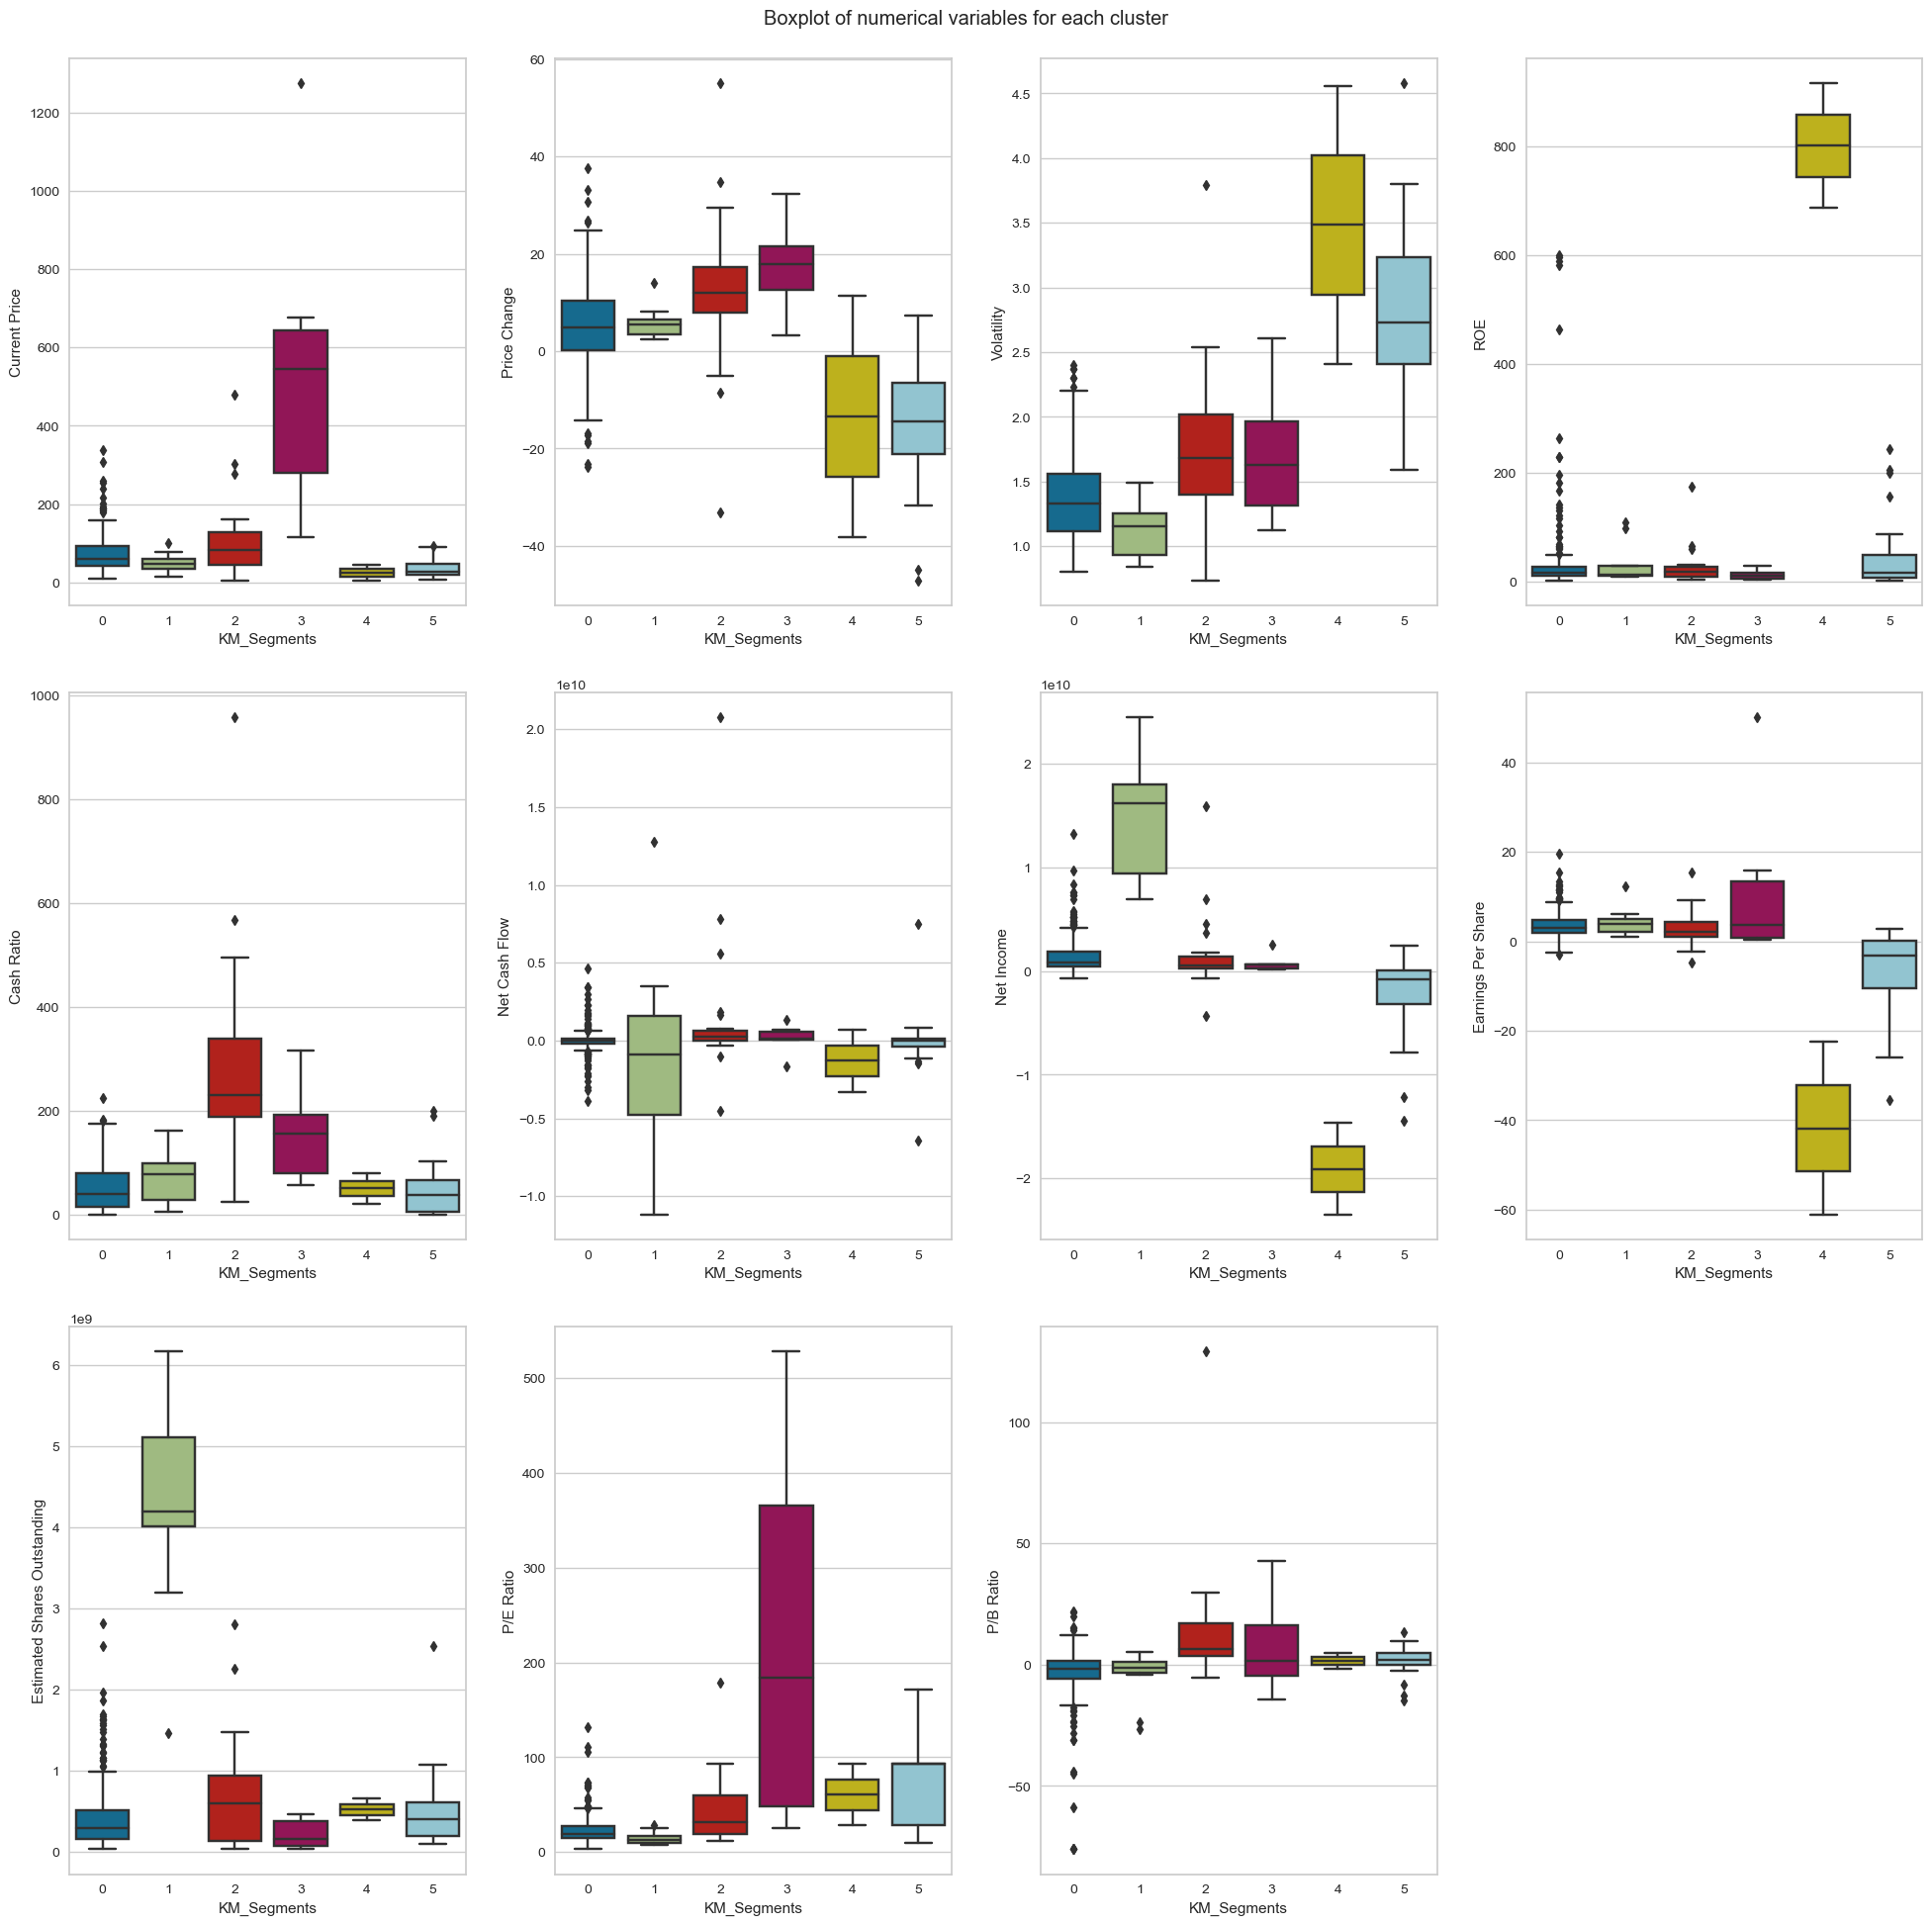

In [36]:
#Let's put the results for the clusters in a boxplot
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

#Selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_Segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights 

#### Cluster 0:
This clusters contains majority of the securities that have the lowest current price, lowest price change, second highest net cash flow, extremely low volaility, and majority of the stocks have a relatively mediocre P/E ratio, with a high amount of shares outstanding being given out
#### Cluster 1: 
This cluster contains the lowest stock price out of all the clusters, but they average the highest net income and shares outstanding
#### Cluster 2:
This cluster contains the highest cash ratios, which indicate a company with a lot of cash reserves. The companies that fall in this category would be from the information technology sector and healhcare
#### Cluster 3:
This cluster contains the highest current price among all the clusters, with a high Earnings per share that is complemented by a high P/E ratio
#### Cluster 4:
This cluster contains the lowest stock price but has the highest volatility, as well as a high ROE 
#### Cluster 5:
This cluster contains the stocks that are probably the lowest performing of all the stocks in the portfolio. These are primarily from the Energy sector. Because EPS, negative price change, etc all play a role in determining that these stocks are underperfoming

## Hierarchical Clustering 

### Computing the Cophentic Correlation

In [37]:
hc_df = subset_scaled_df.copy()

In [38]:
#List of distance metrics 
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] 
#List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] 
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

In [39]:
#List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] 

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


### Checking Dendogram 

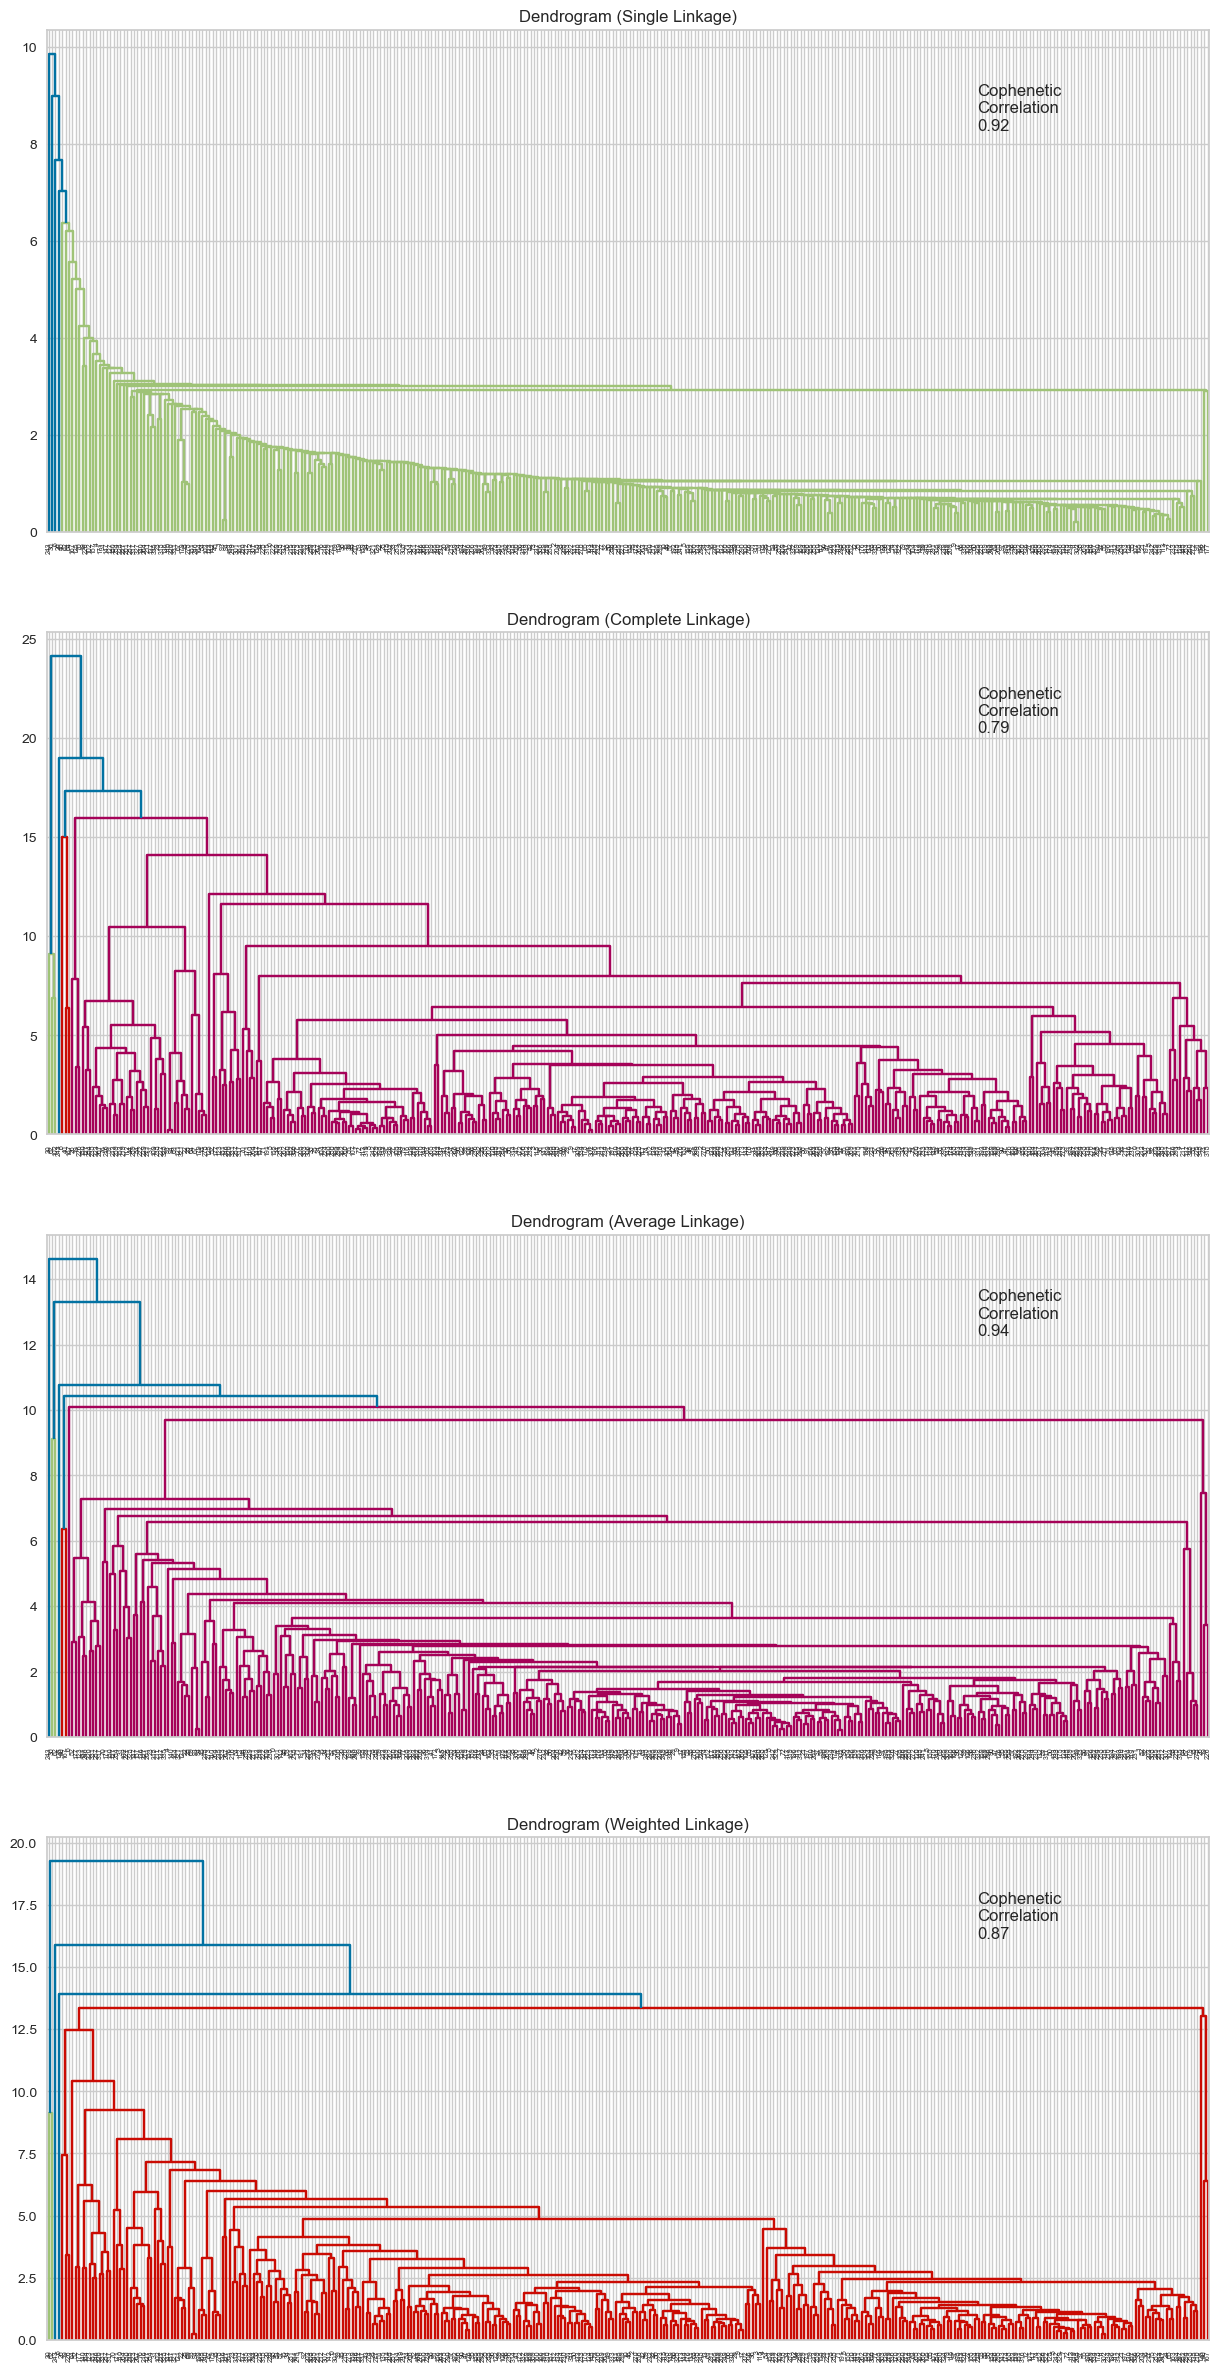

In [40]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [41]:
#Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
1,complete,0.787328
3,weighted,0.869378
0,single,0.923227
2,average,0.942254


* The cophentic correlation is the highest among average linkage
* The amount of clusters it seems like that 6 is a sufficient amount

### Creating model using sklearn

In [42]:
HCModel = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
HCModel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [43]:
df2 = df.copy()
hc_df['HC_Segments'] = HCModel.labels_
df2['HC_Segments'] = HCModel.labels_

### Cluster Profiling

In [44]:
hc_cluster_profile = df2.groupby('HC_Segments').mean()

In [45]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby('HC_Segments')["Security"].count().values)

In [46]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_Segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


In [47]:
## Complete the code to print the companies in each cluster
for cl in df2['HC_Segments'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [48]:
df2.groupby(["HC_Segments", "GICS Sector"])['Security'].count()

HC_Segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

### Insights 

#### Cluster 0:
This cluster contains mainly adequate financials for securities and negative cash flow
#### Cluster 1:
This cluster contains securities with high net cash flows and net income. This one mainly contains financials and information technology securities
#### Cluster 2:
Only Energy stock in this one has negative cash flow and net income and energy stoskc are the only one in this
#### Cluster 3:
This cluster has high high price change and cash ratio, as well as estimated shares outstanding and P/E ratios. Some top tech stocks fall in this cluster
#### Cluster 4:
This cluster has high current prices and Earnings per share

## PCA  

In [49]:
from sklearn.decomposition import PCA

### PCA for KMeans 

In [50]:
#Setting the number of components to 2
km_pca = PCA(n_components=2)

#Transforming the data and storing the results in a dataframe
km_reduced_pca = km_pca.fit_transform(k_means_df)
km_redcued_pca_df = pd.DataFrame(data=km_reduced_pca, columns=['Component 1','Component 2'])

In [51]:
#Checking out the variance of the variance explained
km_pca.explained_variance_ratio_.sum()

0.426146314032922

<AxesSubplot: xlabel='Component 1', ylabel='Component 2'>

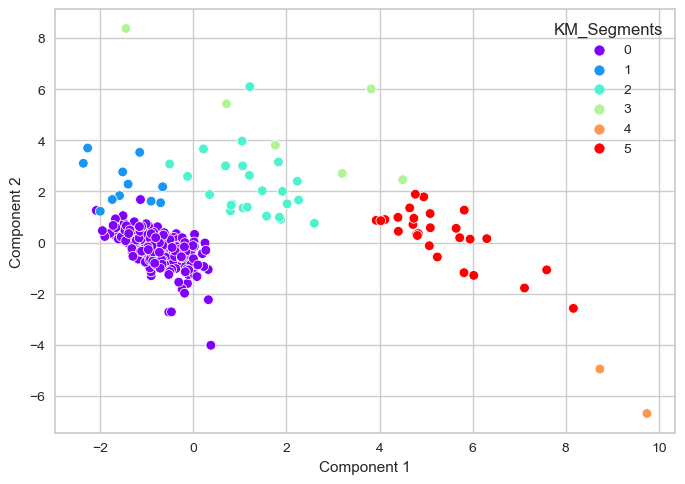

In [52]:
#Scatterplot
sns.scatterplot(data=km_redcued_pca_df, x='Component 1', y='Component 2', hue=k_means_df['KM_Segments'], palette='rainbow')

## Business Insights 

* In regards to the data analytics point of view, Industrials is the sector where the most securities are located
* Since the energy sector is the sector that has the highest price drop, it is wise to remove the energy sector related stocks from the portfolio
* Cluster analysis suggests that the financials are stocks that do not have that much growth, just like the energy sector, however the tech sector as well as consumer discretionary are growing in price. The tech sector also has the net cash flow reserves compared to other sectors, in which makes these investments more safe
* After conducting PCA, we can see that most securities are located within the 0 cluster has the most stocks since they have mediocre growth potential

## The Difference between KMeans and HC Clustering 

* KMeans clustering took the less time to compute and it is also less costly computationally. 
* Hierarchical clustering was a bit more time consuming, in which I prefer the KMeans clustering